In [1]:
# Essential Libraries
import random
import time
import json
import signal
import copy
import glob

# Scientific Libraries
import numpy as np
from scipy.stats import norm

# RDKit Libraries
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

# Graph Libraries
import networkx as nx
import networkx.algorithms.isomorphism as iso

# Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Machine Learning Libraries
from sklearn.metrics import confusion_matrix

# Configure Matplotlib to use LaTeX and Times New Roman for fonts
plt.rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"
rcParams["font.serif"] = ["Times New Roman"]

# Load Graphs for GED Dataset

In [2]:
GED_GRAPHS_400 = {}
GED_GRAPHS_400_path = "GED_GRAPHS_400/"
for name in glob.glob(GED_GRAPHS_400_path + "*.gpickle"):
    graph = nx.read_gpickle(name)
    GED_GRAPHS_400[name[len(GED_GRAPHS_400_path) : -8]] = graph

# Load GED Dataset

In [3]:
with open("GED_Dict_400_400.json", "r") as json_file:
    GED_Dict_400_400 = json.load(json_file)
print(len(GED_Dict_400_400))

160000


In [4]:
random.seed(42)
with open("graph_0_199_IDs.json", "r") as json_file:
    graph_0_199_IDs = json.load(json_file)

random.shuffle(graph_0_199_IDs)

with open("graph_200_399_IDs.json", "r") as json_file:
    graph_200_399_IDs = json.load(json_file)

random.shuffle(graph_200_399_IDs)

graph_0_399_IDs = graph_0_199_IDs + graph_200_399_IDs

# Visualize the features of the 400 graphs

In [5]:
number_node_list = []
number_edge_list = []
for i in range(0, len(graph_0_399_IDs)):
    number_node_list.append(GED_GRAPHS_400[graph_0_399_IDs[i]].number_of_nodes())
    number_edge_list.append(GED_GRAPHS_400[graph_0_399_IDs[i]].number_of_edges())

## Look at the number of nodes

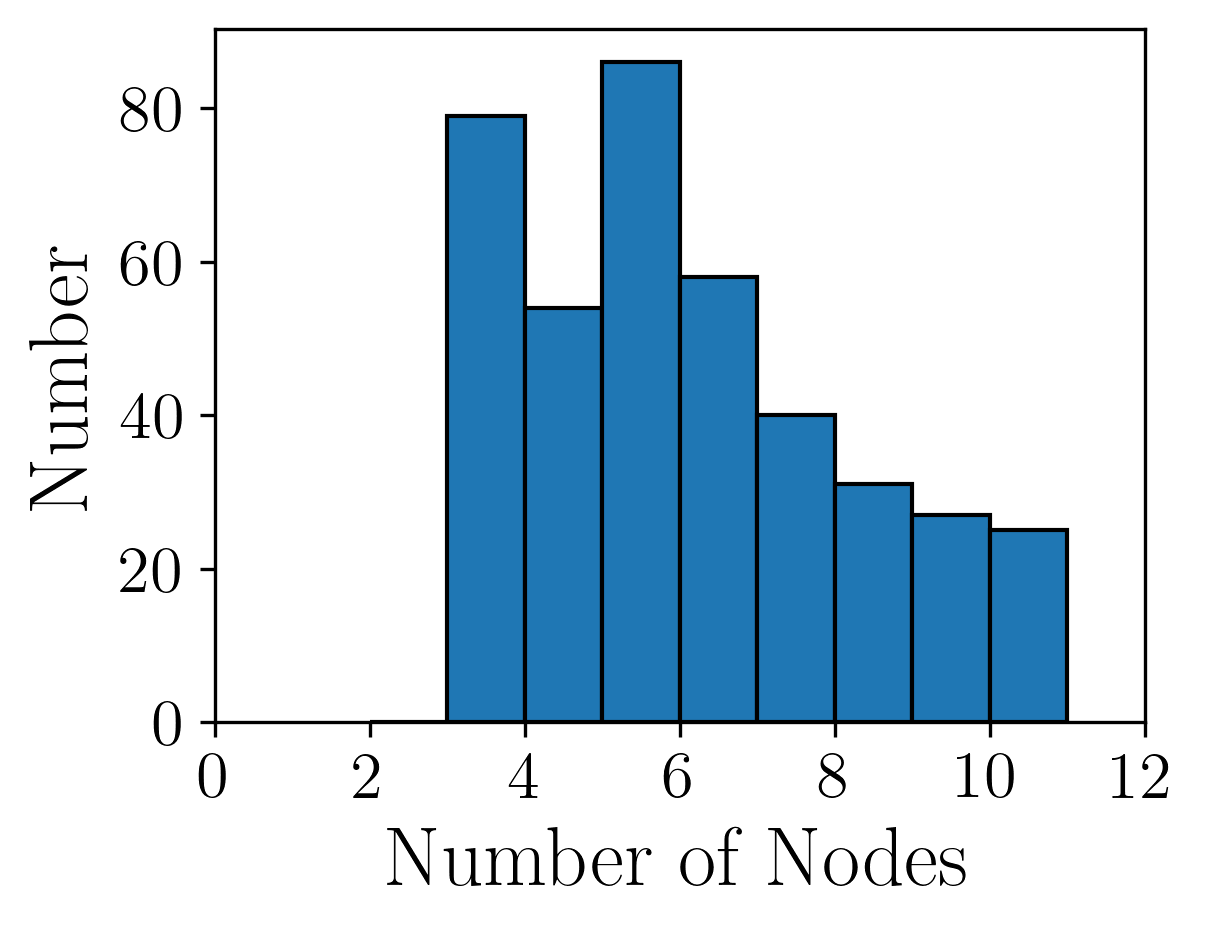

In [6]:
bins = np.arange(2, 12, 1)

plt.figure(figsize=(4, 3), dpi=300)
plt.hist(number_node_list, bins=bins, edgecolor="black")
plt.xlabel("Number of Nodes", size=20)
plt.ylabel("Number", size=20)
plt.xlim(0, 12)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

## Look at the number of edges

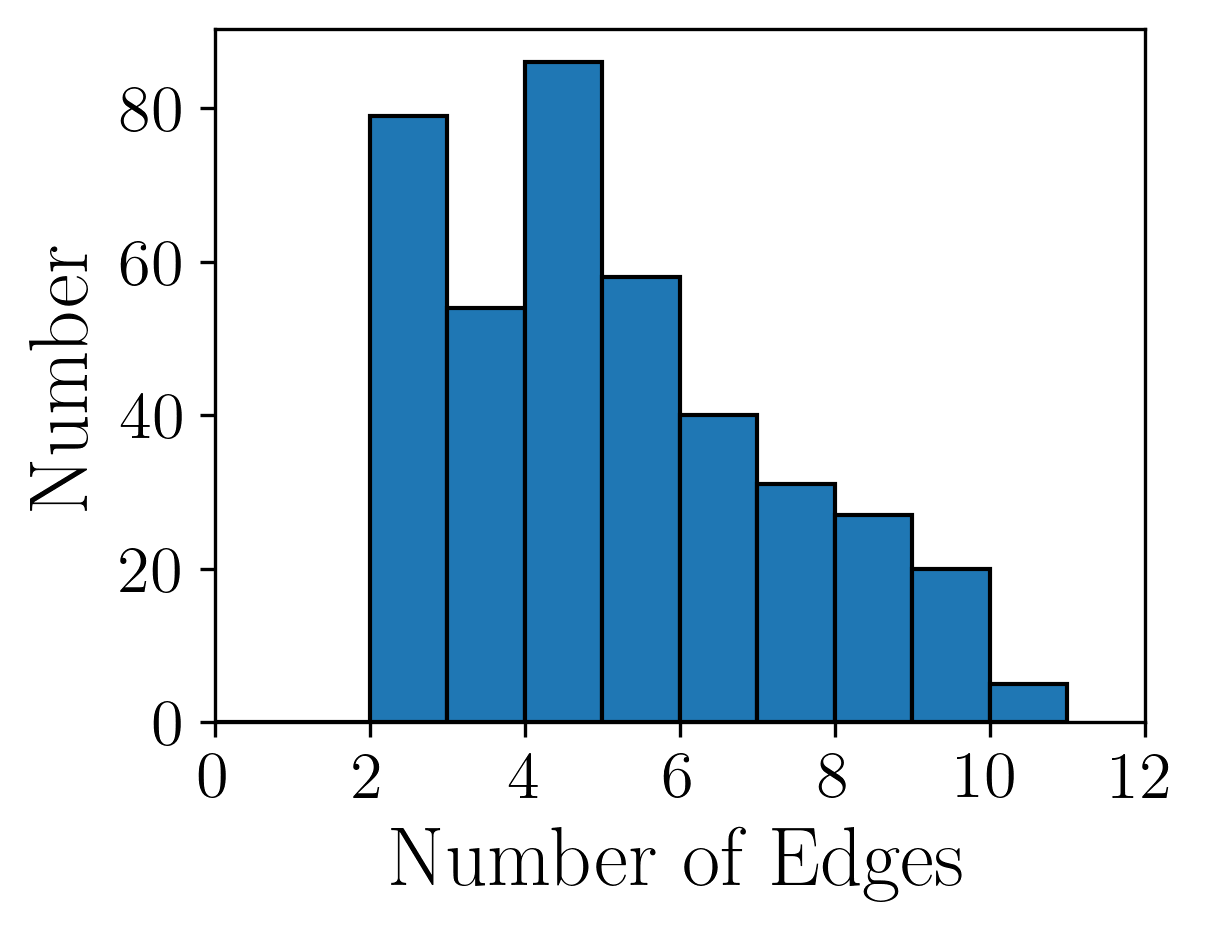

In [7]:
bins = np.arange(0, 12, 1)

plt.figure(figsize=(4, 3), dpi=300)
plt.hist(number_edge_list, bins=bins, edgecolor="black")
plt.xlabel("Number of Edges", size=20)
plt.ylabel("Number", size=20)
plt.xlim(0, 12)
# Increase font size of ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

# Visualize the GED Dataset

In [8]:
ged_matrix = np.zeros([400, 400])

nged_matrix = np.zeros([400, 400])

s_matrix = np.zeros([400, 400])

for i in range(0, len(graph_0_399_IDs)):

    for j in range(0, len(graph_0_399_IDs)):

        graph1_name = graph_0_399_IDs[i]
        graph2_name = graph_0_399_IDs[j]

        graph1_node_amount = len(GED_GRAPHS_400[graph1_name].nodes)

        graph2_node_amount = len(GED_GRAPHS_400[graph2_name].nodes)

        key = graph1_name + "," + graph2_name

        ged = float(GED_Dict_400_400[key])

        nged = ged / (0.5 * (graph1_node_amount + graph2_node_amount))

        s = np.exp(-nged)

        ged_matrix[i, j] = ged
        nged_matrix[i, j] = nged
        s_matrix[i, j] = s

## Look at GED (Graph Edit Distance)

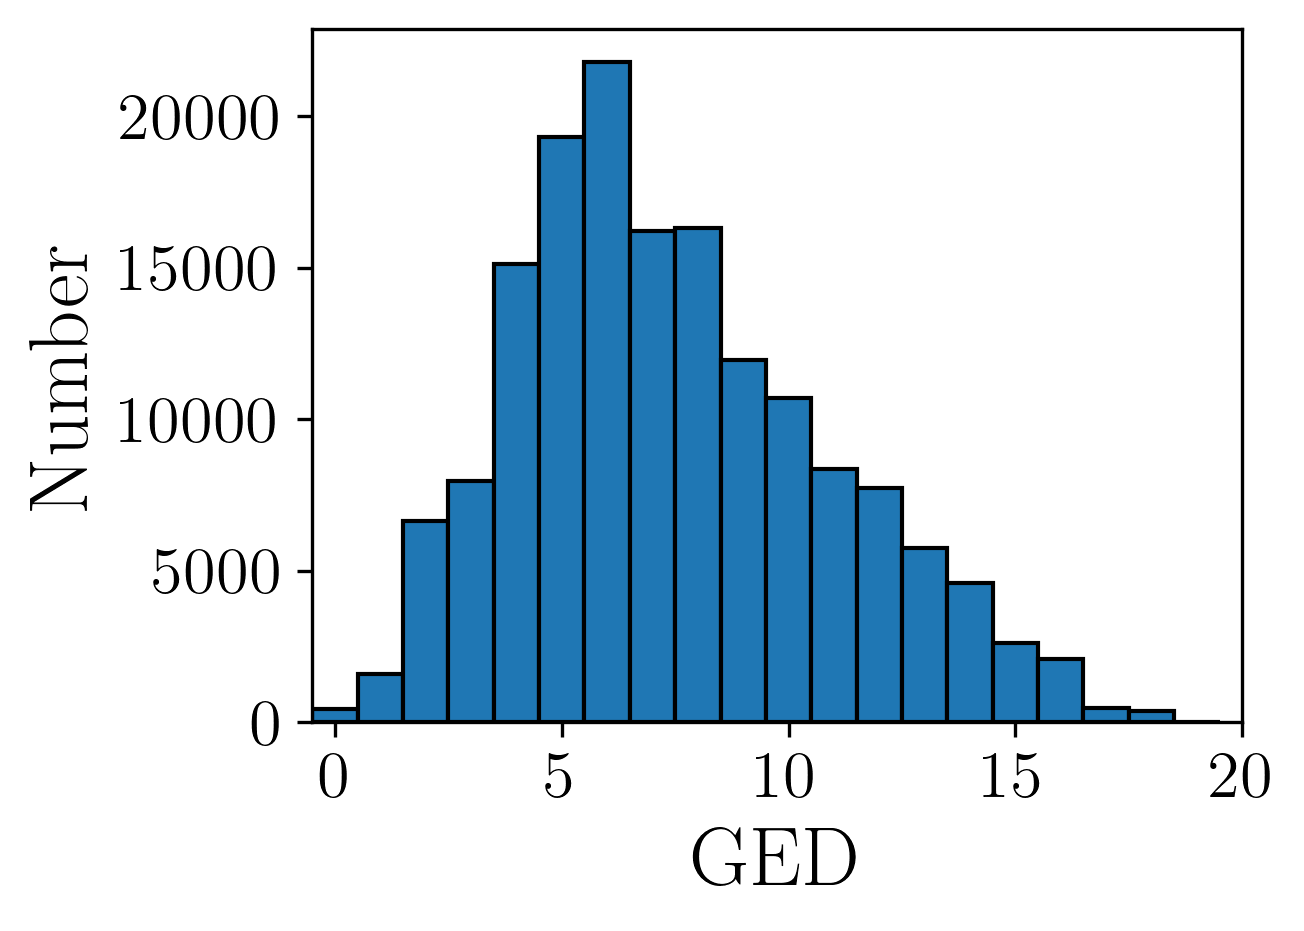

In [9]:
bins = np.arange(-0.5, 20, 1)

plt.figure(figsize=(4, 3), dpi=300)
plt.hist(ged_matrix.flatten(), bins=bins, edgecolor="black")
plt.xlabel("GED", size=20)
plt.ylabel("Number", size=20)
plt.xlim(-0.5, 20)
# Increase font size of ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

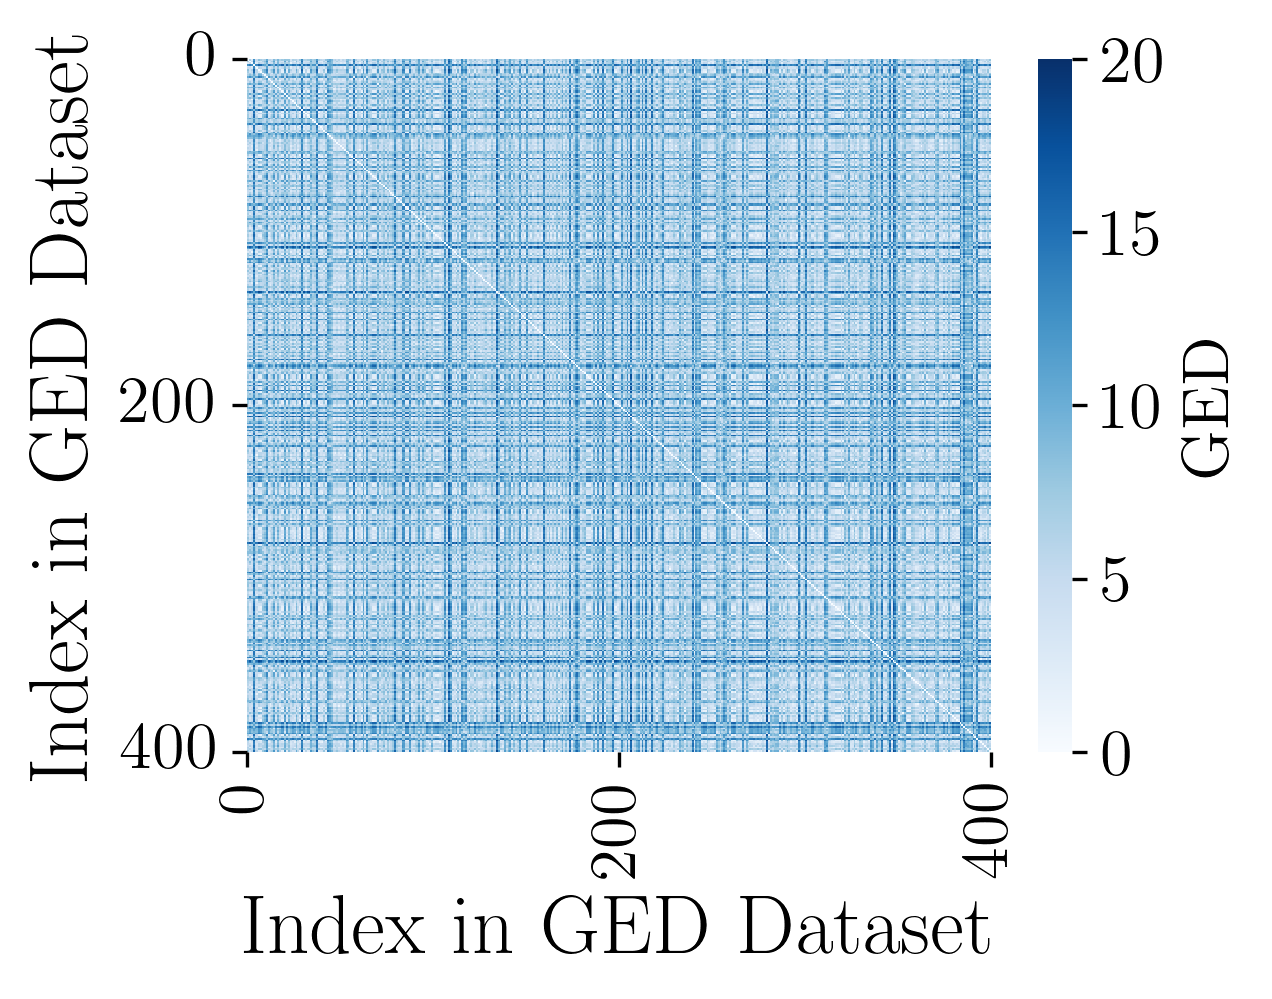

In [10]:
plt.figure(figsize=(4, 3), dpi=300)
sns.heatmap(
    ged_matrix,
    cmap="Blues",
    vmin=0,
    vmax=20,
    cbar_kws={"label": "GED", "ticks": [0, 5, 10, 15, 20]},
)
# Set custom ticks
plt.xticks([0, 200, 400], [0, 200, 400])
plt.yticks([0, 200, 400], [0, 200, 400])
# plt.yticks([0, 470, 1018], [0, 470, 1018])
plt.xlabel("Index in GED Dataset", size=20)
plt.ylabel("Index in GED Dataset", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust color bar tick font size
cbar.ax.set_ylabel("GED", fontsize=16)
plt.show()

## Look at NGED (Normalized GED)

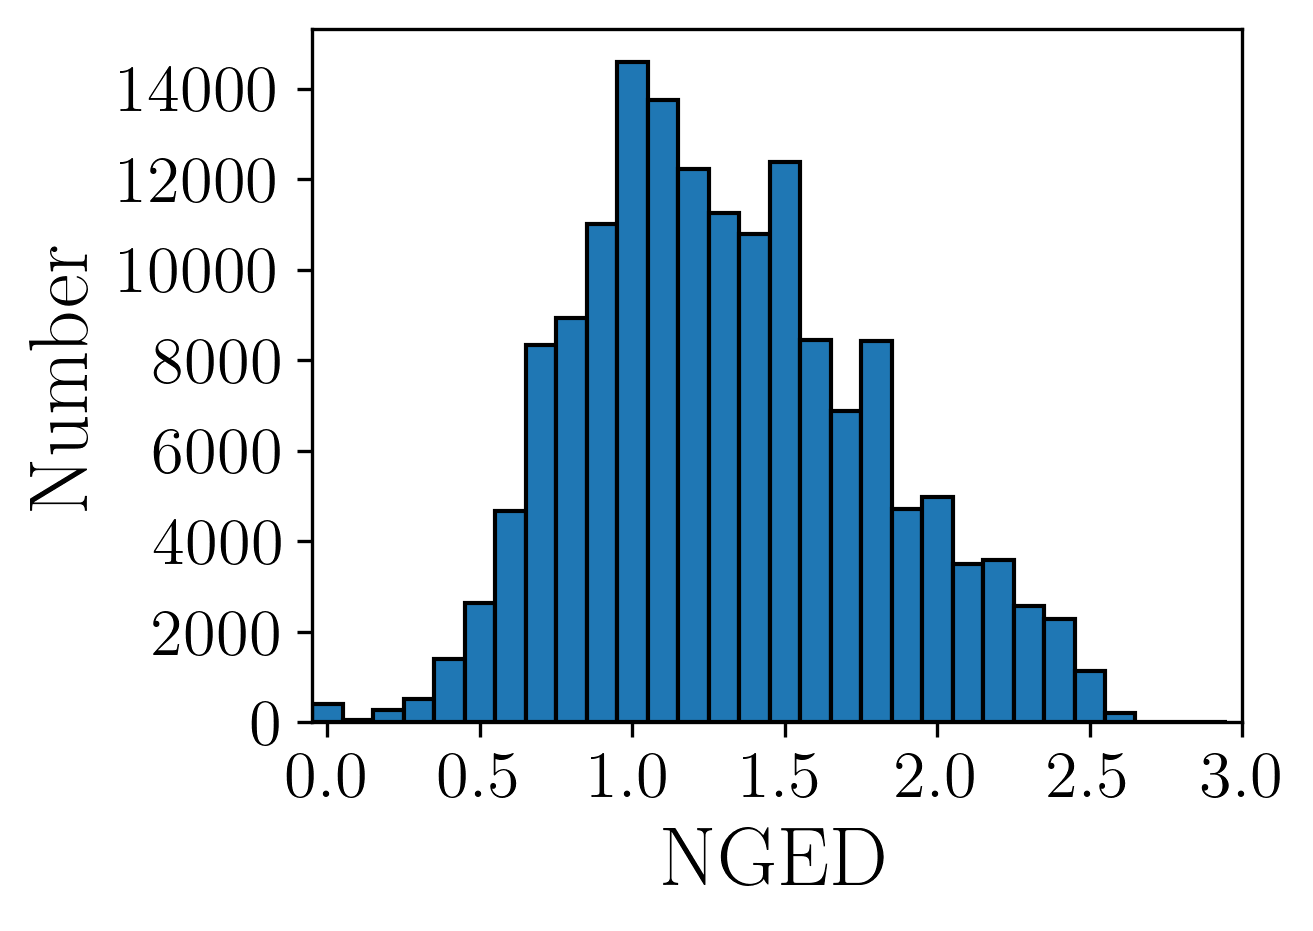

In [11]:
bins = np.arange(-0.05, 3, 0.1)

plt.figure(figsize=(4, 3), dpi=300)
plt.hist(nged_matrix.flatten(), bins=bins, edgecolor="black", align="mid")
plt.xlabel("NGED", size=20)
plt.ylabel("Number", size=20)
plt.xlim(-0.05, 3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

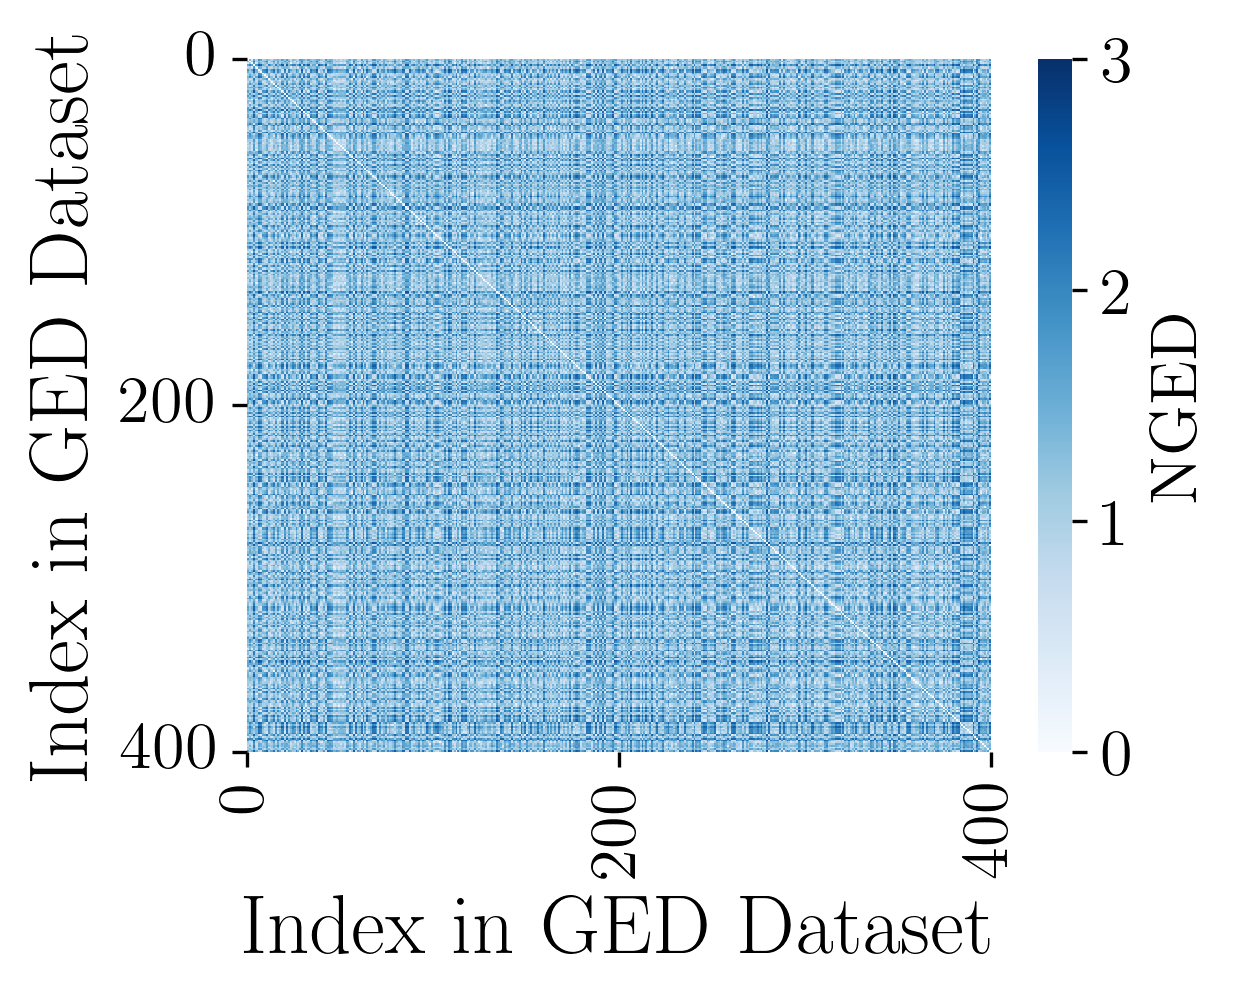

In [12]:
plt.figure(figsize=(4, 3), dpi=300)
sns.heatmap(
    nged_matrix,
    cmap="Blues",
    vmin=0,
    vmax=3,
    cbar_kws={"label": "NGED", "ticks": [0, 1, 2, 3]},
)
# Set custom ticks
plt.xticks([0, 200, 400], [0, 200, 400])
plt.yticks([0, 200, 400], [0, 200, 400])
# plt.yticks([0, 470, 1018], [0, 470, 1018])
plt.xlabel("Index in GED Dataset", size=20)
plt.ylabel("Index in GED Dataset", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust color bar tick font size
cbar.ax.set_ylabel("NGED", fontsize=16)
plt.show()

## Look at Similarity ($s$)

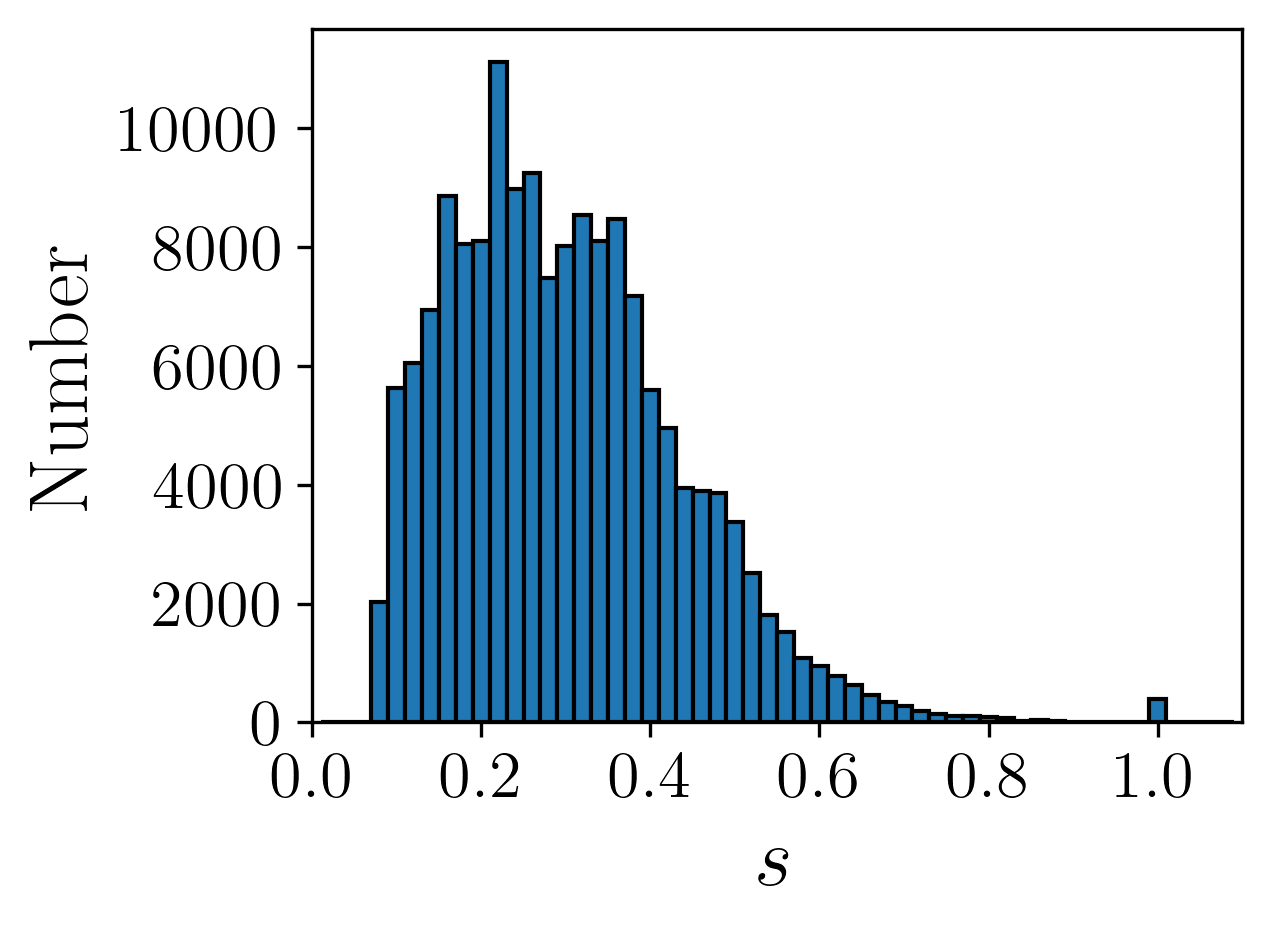

In [13]:
bins = np.arange(0.01, 1.1, 0.02)

plt.figure(figsize=(4, 3), dpi=300)
plt.hist(s_matrix.flatten(), bins=bins, edgecolor="black", align="mid")
plt.xlabel(r"$s$", size=20)
plt.ylabel("Number", size=20)
plt.xlim(0, 1.1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

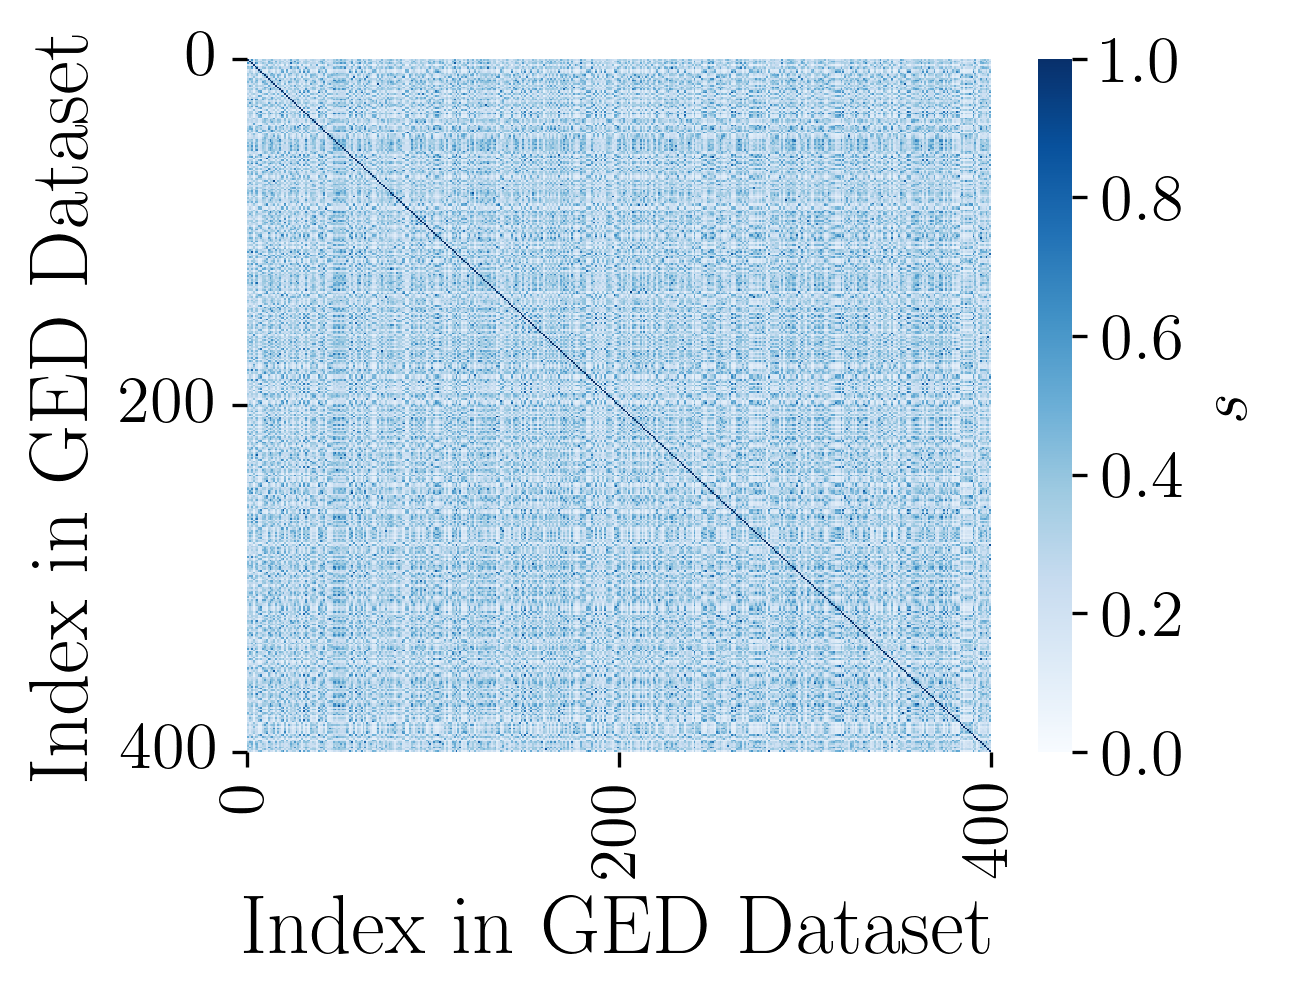

In [14]:
plt.figure(figsize=(4, 3), dpi=300)
sns.heatmap(
    s_matrix,
    cmap="Blues",
    vmin=0,
    vmax=1,
    cbar_kws={"label": r"$s$", "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1]},
)
# Set custom ticks
plt.xticks([0, 200, 400], [0, 200, 400])
plt.yticks([0, 200, 400], [0, 200, 400])
# plt.yticks([0, 470, 1018], [0, 470, 1018])
plt.xlabel("Index in GED Dataset", size=20)
plt.ylabel("Index in GED Dataset", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust color bar tick font size
cbar.ax.set_ylabel(r"$s$", fontsize=16)
plt.show()